In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
eci = pd.read_csv('../Entrenamieto_ECI_2020.csv')

In [5]:
#Visualizamos el set de datos
eci.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [6]:
#Listado de columnas
list(eci.columns) 

['ID',
 'Region',
 'Territory',
 'Pricing, Delivery_Terms_Quote_Appr',
 'Pricing, Delivery_Terms_Approved',
 'Bureaucratic_Code_0_Approval',
 'Bureaucratic_Code_0_Approved',
 'Submitted_for_Approval',
 'Bureaucratic_Code',
 'Account_Created_Date',
 'Source ',
 'Billing_Country',
 'Account_Name',
 'Opportunity_Name',
 'Opportunity_ID',
 'Sales_Contract_No',
 'Account_Owner',
 'Opportunity_Owner',
 'Account_Type',
 'Opportunity_Type',
 'Quote_Type',
 'Delivery_Terms',
 'Opportunity_Created_Date',
 'Brand',
 'Product_Type',
 'Size',
 'Product_Category_B',
 'Price',
 'Currency',
 'Last_Activity',
 'Quote_Expiry_Date',
 'Last_Modified_Date',
 'Last_Modified_By',
 'Product_Family',
 'Product_Name',
 'ASP_Currency',
 'ASP',
 'ASP_(converted)_Currency',
 'ASP_(converted)',
 'Planned_Delivery_Start_Date',
 'Planned_Delivery_End_Date',
 'Month',
 'Delivery_Quarter',
 'Delivery_Year',
 'Actual_Delivery_Date',
 'TRF',
 'Total_Amount_Currency',
 'Total_Amount',
 'Total_Taxable_Amount_Currency',
 'T

### Analisis de la columna SIZE
Vamos a analizar la columna size, para ello vamos a realizar primero una agrupacion por size para identificar la distribucion de registros en el set de datos

Text(0,0.5,'Cantidad de registros')

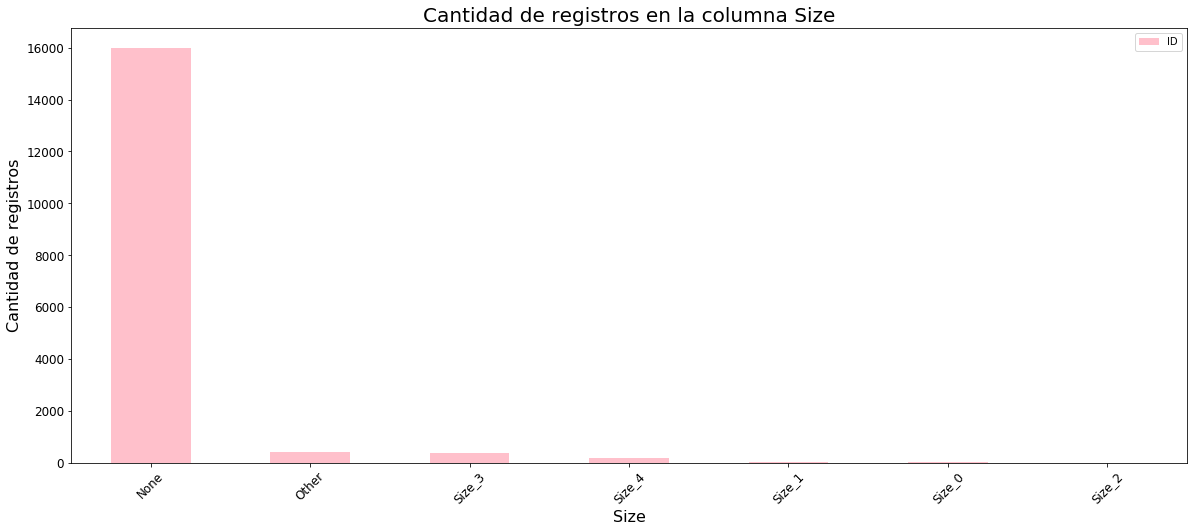

In [7]:
#Analisis Basico 
#Empezemos a ver la cantidad de registros que tenemos en la columna size

size = eci.groupby('Size').agg({'ID':'count'}).sort_values(by='ID', ascending=False)

size.plot(kind='bar',rot=45, figsize=(20,8), color='pink' ,fontsize=12)

plt.title('Cantidad de registros en la columna Size', fontsize=20);
plt.xlabel('Size', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)

Observamos que tenemos muy poca informacion respecto a esta columna. Predominan el campo "None" el cual no informa algun valor
Veamos ahora la distribucion referente al estado 

Veamos a ver si podemos combinar la columna stage con el campo que nos interesa predecir a futuro "STAGE"

Text(0,0.5,'Cantidad de registros')

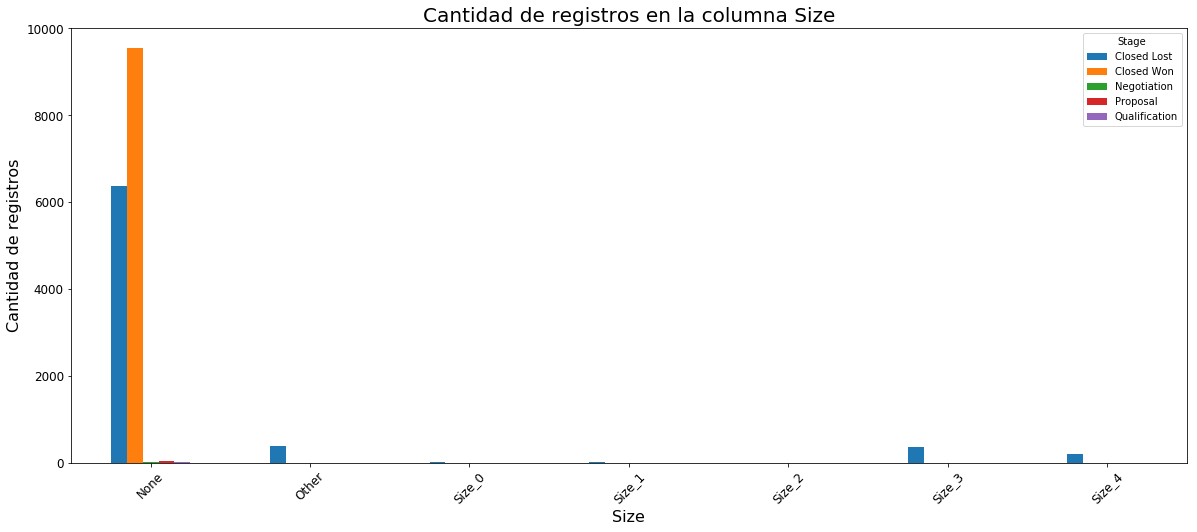

In [8]:
size_group = eci.groupby(['Size','Stage']).agg({'ID':'count'}).sort_values(by='ID', ascending=False).reset_index()
size_pivot = size_group.pivot_table(index='Size',columns='Stage',values='ID', aggfunc=np.sum)
size_pivot.plot(kind='bar',rot=45, figsize=(20,8),fontsize=12)

plt.title('Cantidad de registros en la columna Size', fontsize=20);
plt.xlabel('Size', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)

Text(68.0938,0.5,'Valores de Size')

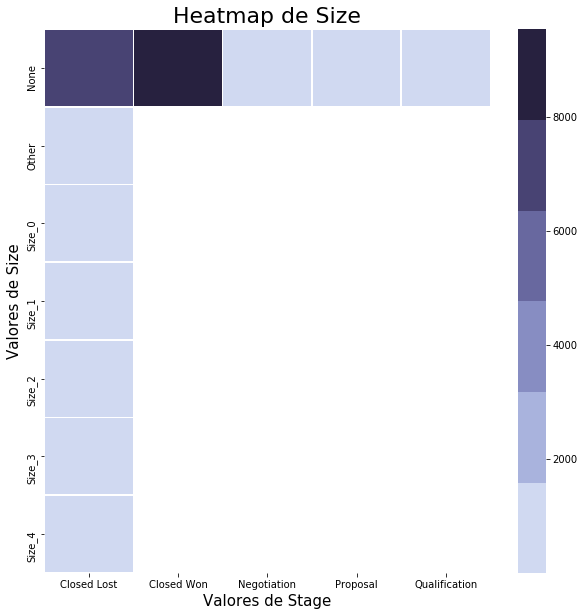

In [182]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(size_pivot, cmap=sns.color_palette("ch:s=.10,rot=-.10"), linewidths=0.5, cbar_kws={"orientation": "vertical"}, ax=ax)
g.set_title("Heatmap de Size", fontsize=22)
g.set_xlabel("Valores de Stage",fontsize=15)
g.set_ylabel("Valores de Size", fontsize=15)

Aca podemos observar que para la columna NONE tenemos una mayor cartidad de casos ganados contra los perdidos, podemos filtrar por la columna none para ver si descubrimos algo

Text(0,0.5,'Cantidad de registros')

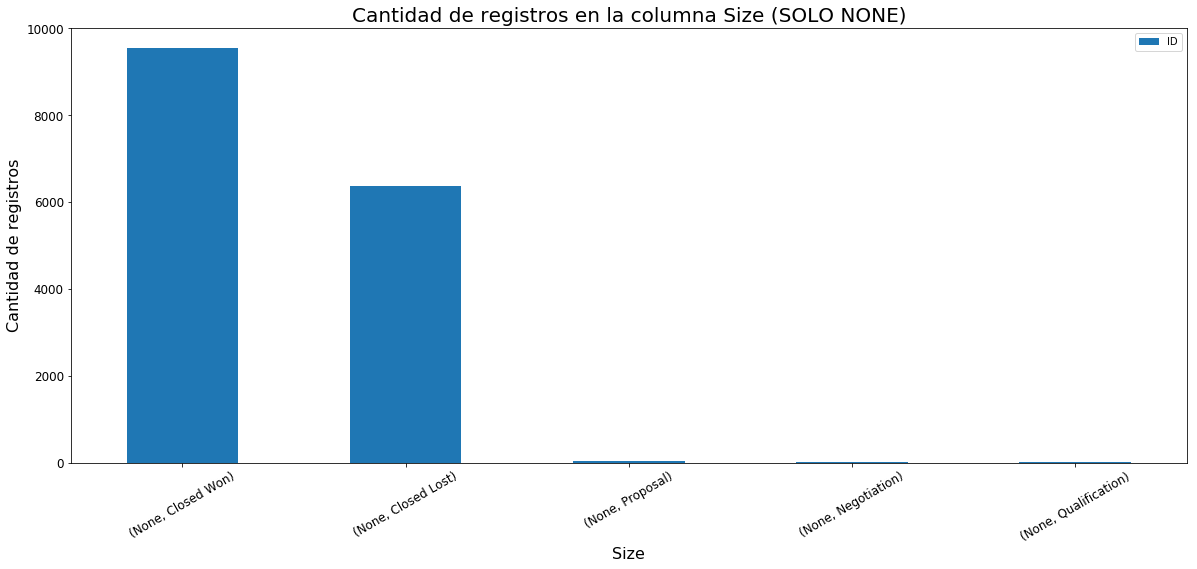

In [111]:
eci_none = eci.loc[eci.Size.str.contains('None'),:]
size_stage = eci_none.groupby(['Size','Stage']).agg({'ID':'count'}).sort_values(by='ID', ascending=False)

size_stage.plot(kind='bar',rot=30, figsize=(20,8) ,fontsize=12)

plt.title('Cantidad de registros en la columna Size (SOLO NONE)', fontsize=20);
plt.xlabel('Size', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)

Dado que esta columna predomina el campo none, deberia realizarse un analisis para analizar con otras columnas para ver su relevancia o un patron. Por el momento no estamos viendo nada en comun

### Analisis de la columna PRODUCT_TYPE
Vamos a analizar la columna product type, para ello vamos a realizar primero una agrupacion por size para identificar la distribucion de registros en el set de datos

Text(0,0.5,'Cantidad de registros')

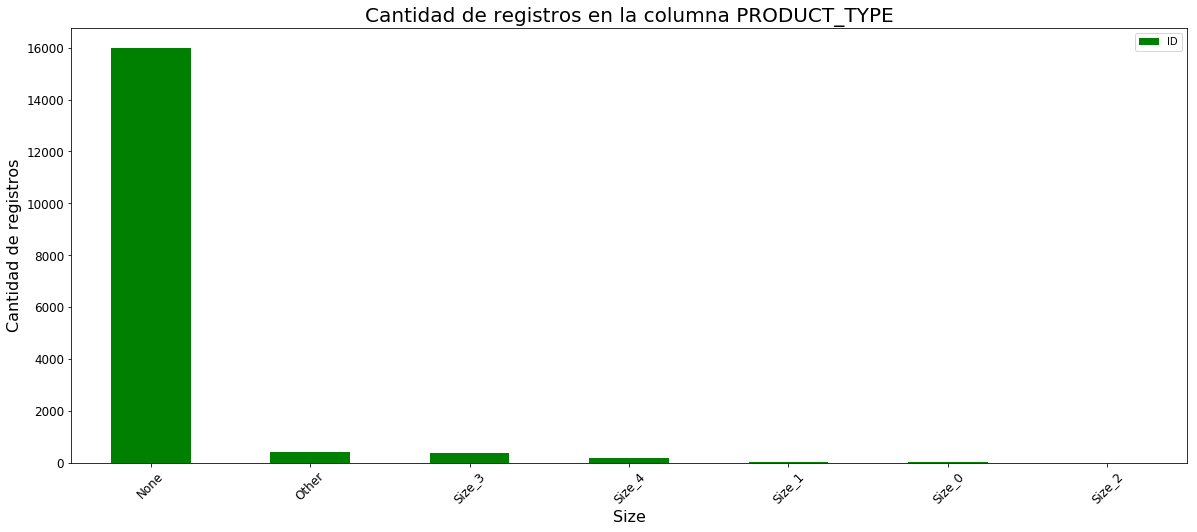

In [57]:
product_type = eci.groupby('Size').agg({'ID':'count'}).sort_values(by='ID', ascending=False)

product_type.plot(kind='bar',rot=45, figsize=(20,8), color='green' ,fontsize=12)

plt.title('Cantidad de registros en la columna PRODUCT_TYPE', fontsize=20);
plt.xlabel('Size', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)

Aca podemos observar que para la columna NONE tenemos una mayor cartidad de casos ganados contra los perdidos, podemos filtrar por la columna none para ver si descubrimos algo

Text(0,0.5,'Cantidad de registros')

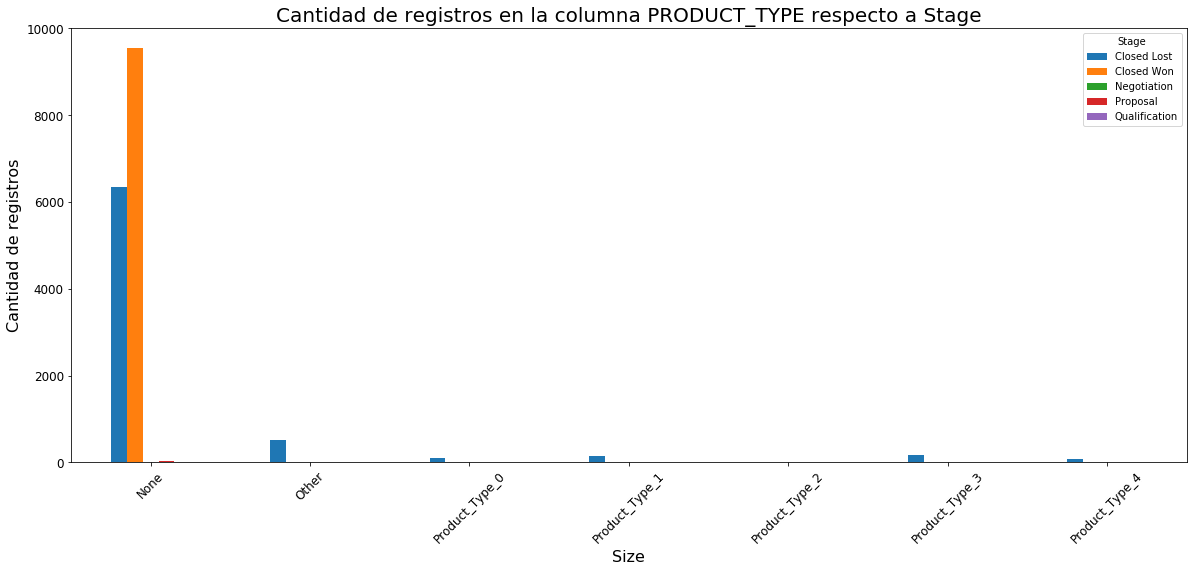

In [130]:
eci_pivot = eci.groupby(['Product_Type','Stage']).agg({'ID':'count'}).sort_values(by='ID', ascending=False).reset_index()
eci_plot = eci_pivot.pivot_table(index='Product_Type',columns='Stage',values='ID', aggfunc=np.sum)
eci_plot.plot(kind='bar',rot=45, figsize=(20,8),fontsize=12)

plt.title('Cantidad de registros en la columna PRODUCT_TYPE respecto a Stage', fontsize=20);
plt.xlabel('Size', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)


Podemos observar que la proporcion de NONE es predominante y no tenemos informacion respecto al resto de la columnas

Text(68.0938,0.5,'Valores de Product Type')

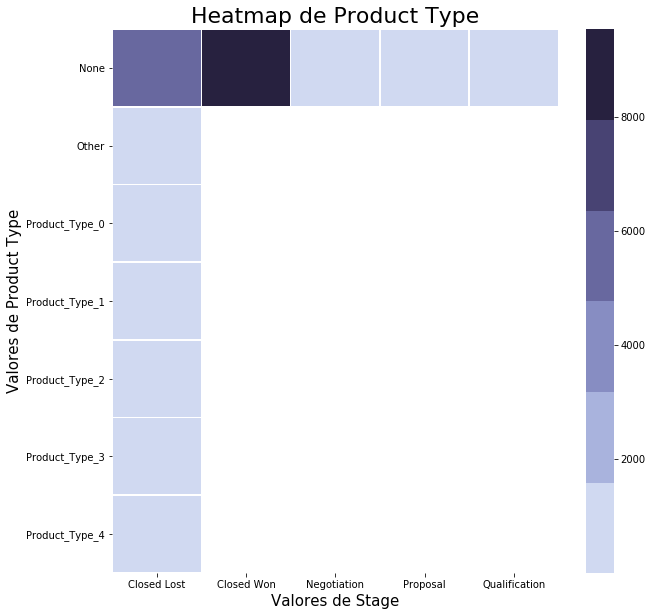

In [174]:
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(eci_plot, cmap=sns.color_palette("ch:s=.10,rot=-.10"), linewidths=0.5, cbar_kws={"orientation": "vertical"}, ax=ax)
g.set_title("Heatmap de Product Type", fontsize=22)
g.set_xlabel("Valores de Stage",fontsize=15)
g.set_ylabel("Valores de Product Type", fontsize=15)

Nuevamente podemos observar que dichas columnas predominan los valores NONE en los cuales se concentran la mayoria de los casos ganados y perdidos

## Analisis de la columna Brand
Ahora vamos a analizar la columna Brand para poder observar algun patron

Text(0,0.5,'Cantidad de registros')

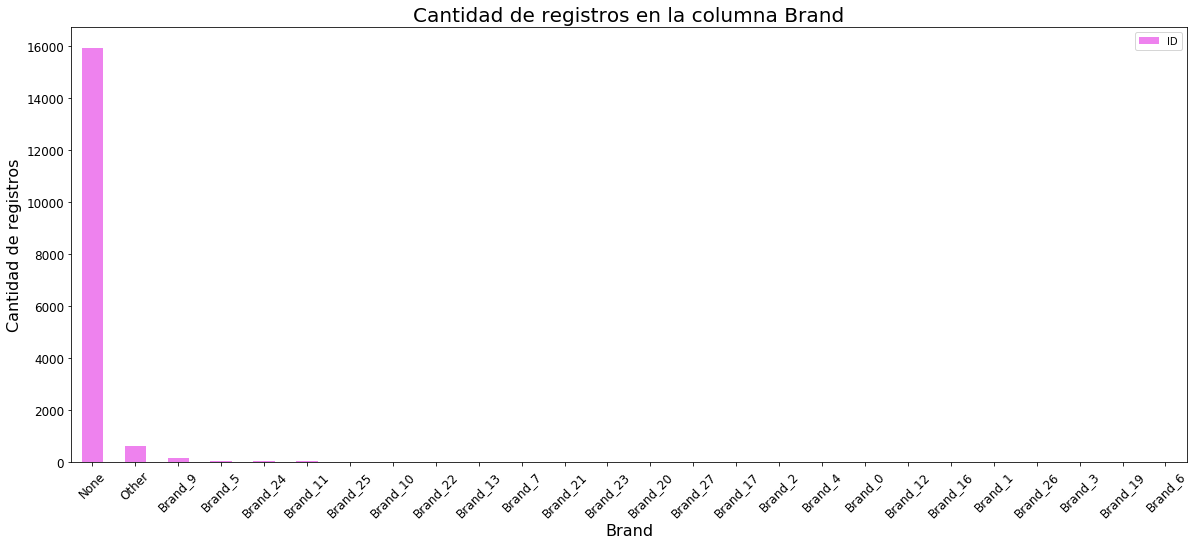

In [213]:

brand = eci.groupby('Brand').agg({'ID':'count'}).sort_values(by='ID', ascending=False)

brand.plot(kind='bar',rot=45, figsize=(20,8), color='violet' ,fontsize=12)

plt.title('Cantidad de registros en la columna Brand', fontsize=20);
plt.xlabel('Brand', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)

Text(0,0.5,'Cantidad de registros')

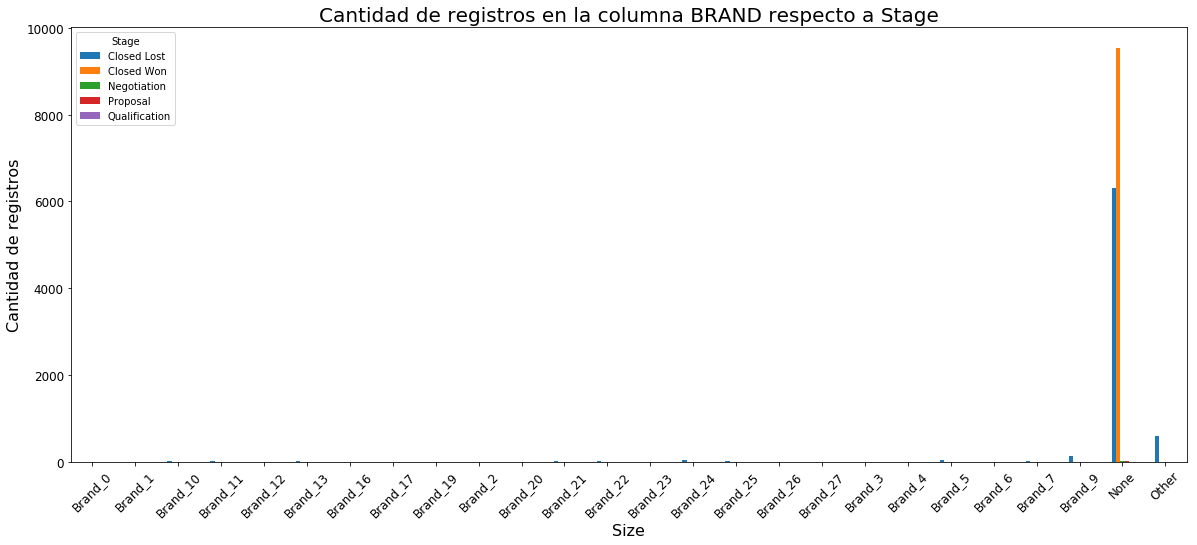

In [214]:
eci_pivot_brand = eci.groupby(['Brand','Stage']).agg({'ID':'count'}).sort_values(by='ID', ascending=False).reset_index()
eci_plot = eci_pivot_brand.pivot_table(index='Brand',columns='Stage',values='ID', aggfunc=np.sum)
eci_plot.plot(kind='bar',rot=45, figsize=(20,8),fontsize=12)

plt.title('Cantidad de registros en la columna BRAND respecto a Stage', fontsize=20);
plt.xlabel('Size', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)

Text(113.094,0.5,'Valores de Product Type')

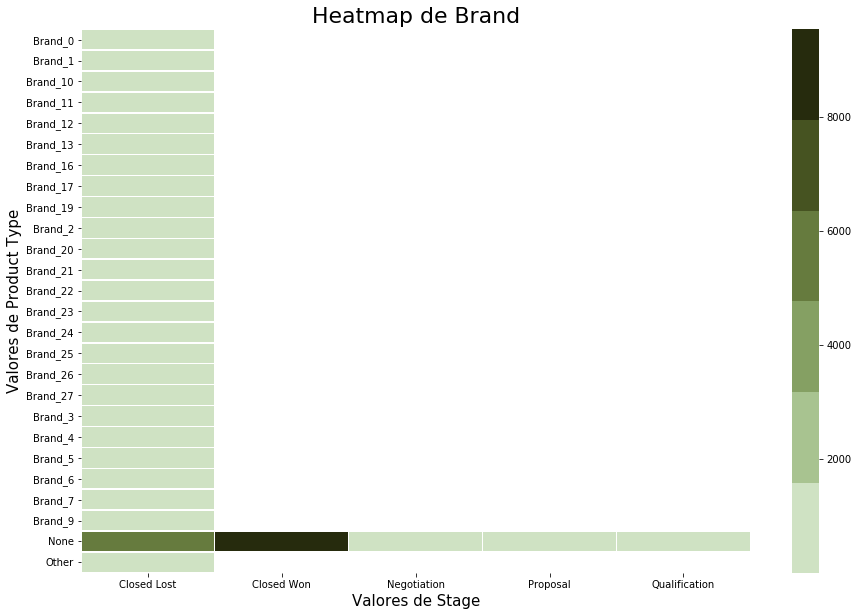

In [215]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.heatmap(eci_plot, cmap=sns.color_palette("ch:s=1.5,rot=0.1"), linewidths=0.5, cbar_kws={"orientation": "vertical"}, ax=ax)
g.set_title("Heatmap de Brand", fontsize=22)
g.set_xlabel("Valores de Stage",fontsize=15)
g.set_ylabel("Valores de Product Type", fontsize=15)

Text(0,0.5,'Cantidad de registros')

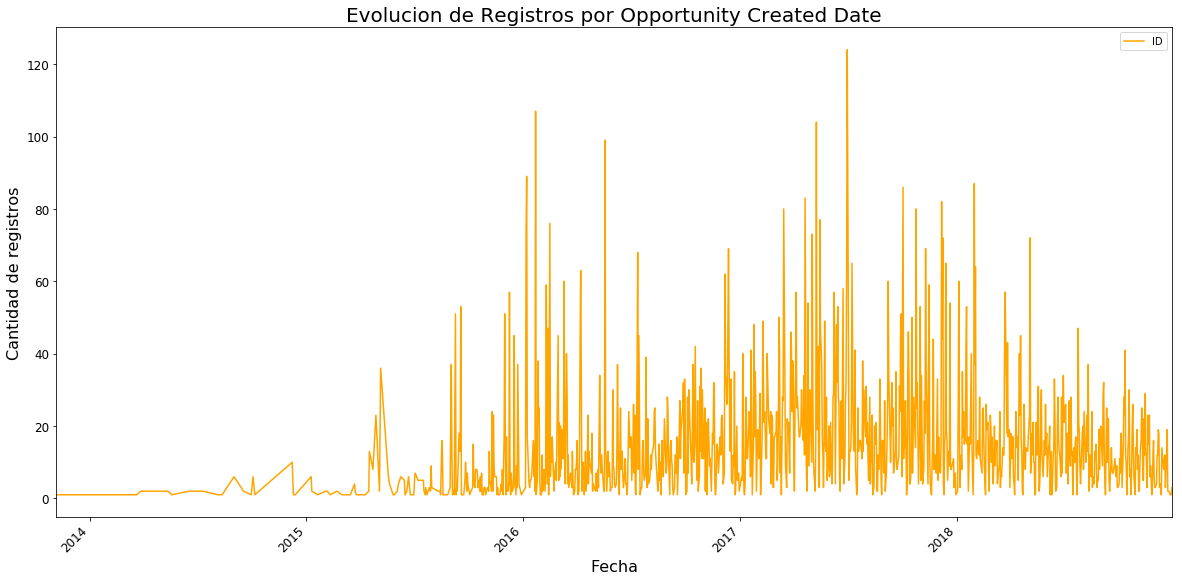

In [34]:
eci2 = eci
eci2['Opportunity_Created_Date_formated'] = pd.to_datetime(eci2['Opportunity_Created_Date'])
opportunity_created = eci2.groupby('Opportunity_Created_Date_formated').agg({'ID':'count'}).sort_values(by='Opportunity_Created_Date_formated', ascending=True)

opportunity_created.plot(kind='line',rot=45, figsize=(20,10), color= 'Orange', fontsize=12)

plt.title('Evolucion de Registros por Opportunity Created Date', fontsize=20);
plt.xlabel('Fecha', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)

Text(0,0.5,'Cantidad de registros')

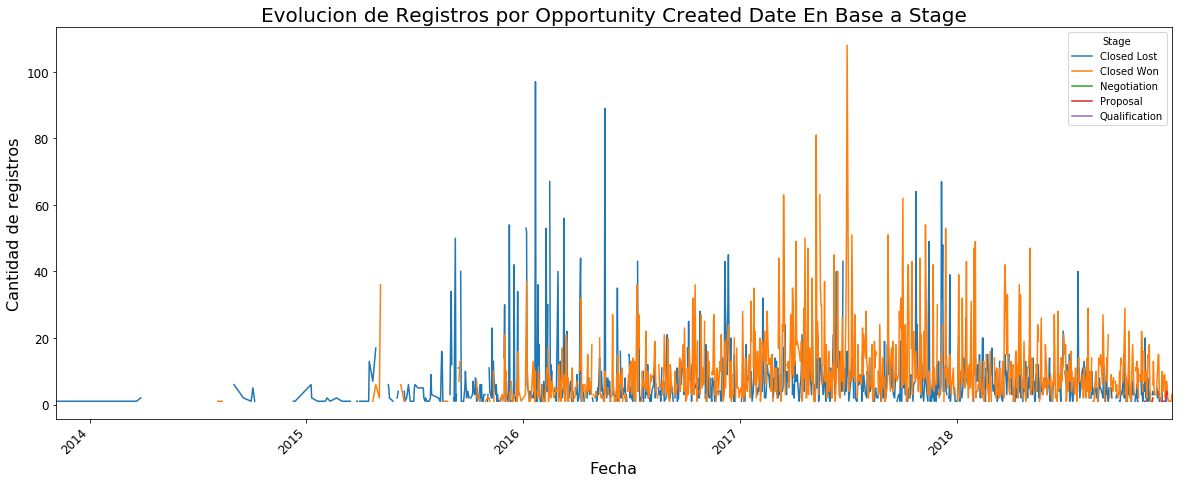

In [42]:
eci_pivot_date_opportunity= eci2.groupby(['Opportunity_Created_Date_formated','Stage']).agg({'ID':'count'}).sort_values(by='Opportunity_Created_Date_formated', ascending=True).reset_index()
eci_plot = eci_pivot_date_opportunity.pivot_table(index='Opportunity_Created_Date_formated',columns='Stage',values='ID', aggfunc=np.sum)
eci_plot.plot(kind='line',rot=45, figsize=(20,8),fontsize=12)

plt.title('Evolucion de Registros por Opportunity Created Date En Base a Stage', fontsize=20);
plt.xlabel('Fecha', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)

Text(0,0.5,'Cantidad de registros')

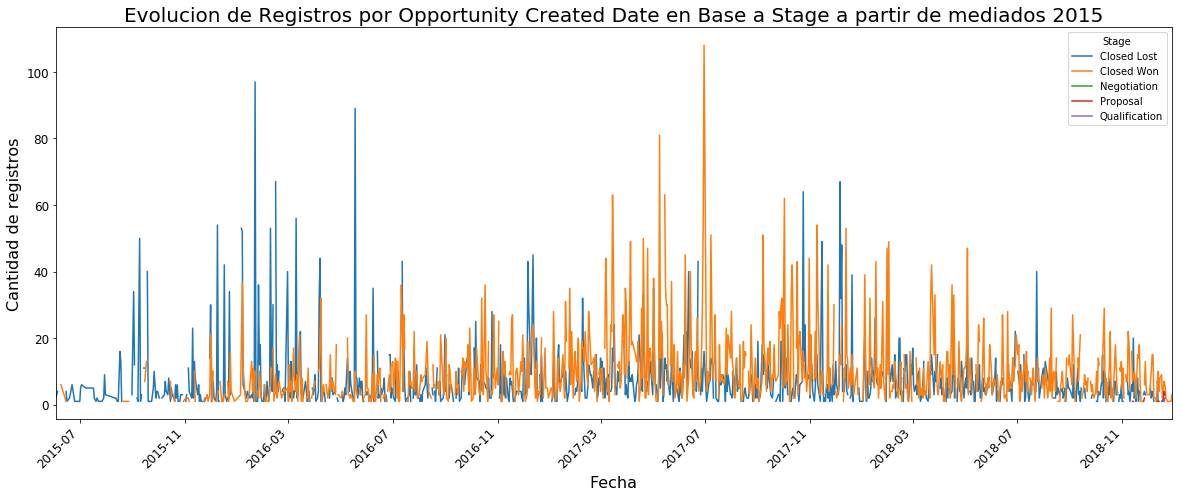

In [44]:
eci_2016 = eci2.loc[eci2.Opportunity_Created_Date_formated.between('2015-06-01','2020-01-01', inclusive=False),:]
eci_pivot_date_opportunity= eci_2016.groupby(['Opportunity_Created_Date_formated','Stage']).agg({'ID':'count'}).sort_values(by='Opportunity_Created_Date_formated', ascending=True).reset_index()
eci_plot = eci_pivot_date_opportunity.pivot_table(index='Opportunity_Created_Date_formated',columns='Stage',values='ID', aggfunc=np.sum)
eci_plot.plot(kind='line',rot=45, figsize=(20,8),fontsize=12)
plt.title('Evolucion de Registros por Opportunity Created Date en Base a Stage a partir de mediados 2015', fontsize=20);
plt.xlabel('Fecha', fontsize=16);
plt.ylabel('Cantidad de registros', fontsize=16)

In [38]:
eci_plot

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Opportunity_Created_Date_formated,,,,,
2013-11-05,1.0,NaN,NaN,NaN,NaN
2014-03-21,1.0,NaN,NaN,NaN,NaN
2014-03-28,2.0,NaN,NaN,NaN,NaN
2014-05-13,NaN,2.0,NaN,NaN,NaN
2014-05-19,1.0,NaN,NaN,NaN,NaN
2014-06-17,NaN,2.0,NaN,NaN,NaN
2014-07-11,2.0,NaN,NaN,NaN,NaN
2014-08-05,NaN,1.0,NaN,NaN,NaN
2014-08-12,NaN,1.0,NaN,NaN,NaN


Nuevamente podemos observar 

In [7]:
#Registros por territory
eci.groupby('Territory').agg({'ID':'count'})

,ID
Territory,
Albania,2
Armenia,2
Australia,1208
Austria,145
Belarus,4
Belgium,285
Bosnia & Herzegovina,4
Bulgaria,5
Burma,1


In [8]:
#Registros por territory
eci.groupby('Territory').agg({'ID':'count'}).nlargest(20,'ID')

,ID
Territory,
None,4999
Germany,1682
NW America,1568
Australia,1208
India,809
NE America,760
Japan,681
Netherlands,533
SE America,493


In [12]:
#Registros por stage (Ver si esta balanceado)
eci.groupby('Stage').agg({'ID':'count'}).nlargest(20,'ID')

,ID
Stage,
Closed Won,9533
Closed Lost,7350
Proposal,35
Negotiation,18
Qualification,11


In [63]:
#Registros por stage (Ver si esta balanceado)
eci.groupby(['Planned_Delivery_End_Date','Stage']).agg({'ID':'count'}).nlargest(100,'ID')

,,ID
Planned_Delivery_End_Date,Stage,
3/31/2016,Closed Lost,402
2/29/2016,Closed Lost,267
6/30/2016,Closed Lost,184
9/30/2016,Closed Lost,170
6/30/2017,Closed Lost,168
9/28/2018,Closed Lost,162
6/29/2018,Closed Lost,155
6/30/2017,Closed Won,154
12/31/2017,Closed Lost,146
